# <div class="h1">iWildCam 2020 - FGVC7</div>

## Let's detect wild animals in new places!

### <u>Note</u>

**Update information**

Update1(Commit5): I added visualization of data distribution.

Update2(Commit9): I organized graphs for easy comparison of datas, and add comments.


<font color='red' size=3>If you like this kernel, please vote! Thank you!</font> 😹

In [2]:
%%HTML
<style type="text/css">
div.h1 {
    background-color:#e17b34; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 35px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}

div.h2 {
    background-color:#83ccd2; 
    color: white; 
    padding: 8px; 
    padding-right: 300px; 
    font-size: 35px; 
    max-width: 1500px; 
    margin: auto; 
    margin-top: 50px;
}
</style>

## About this kernel

I want to give you an overview of the prior knowledge and data that might be needed in this challenge!

This contest aims to detect wildlife in trapped picture at new monitoring locations. Now, we can get great insights about wildlife by camera traps. Camera trap is popular method and there are so many data in the world. But due to the so large number of data, it seems that the data was not always effectively accessed and utilized. 

In this competition, we aim to develop a model that effectively classifies animals taken at different observation points　in the world. This challenge. This challenge will surely bring great insights. 

### We can deal great wildlife picures!

### Let's take a look!!!😺

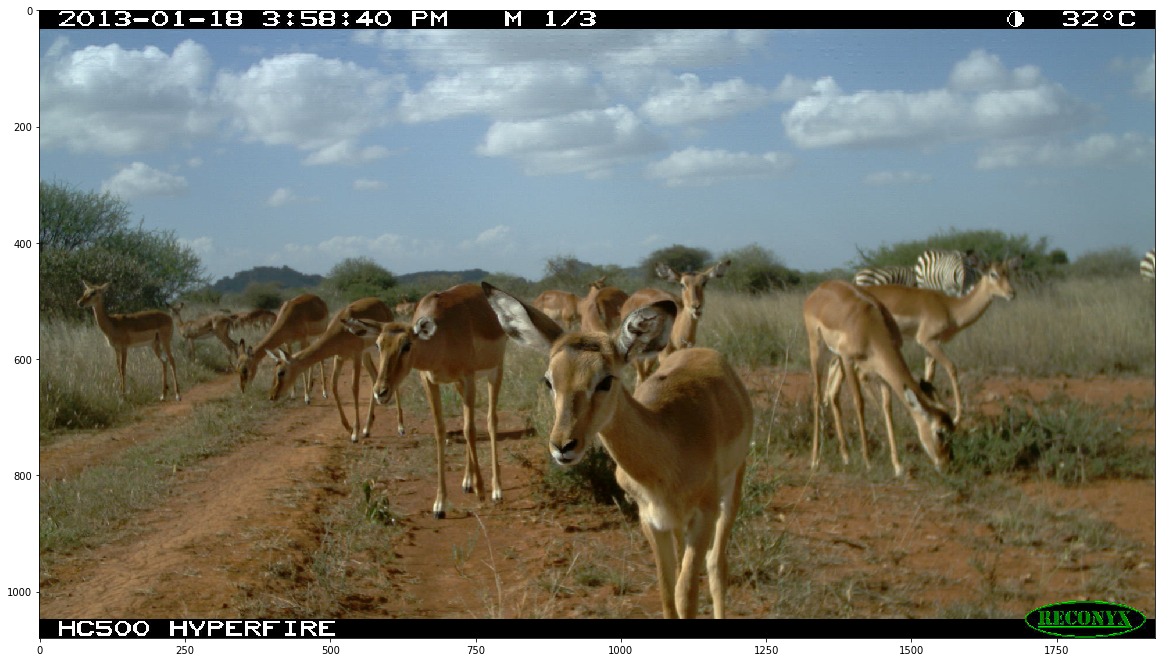

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 12))
im = Image.open('./data/iwildcam-2020-fgvc7/train/939e25fc-21bc-11ea-a13a-137349068a90.jpg')
plt.imshow(im)

How cute!😻

# <div class="h2">Data Overview</div>

In [4]:
from PIL import Image, ImageDraw
import glob 
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

## <u>1. Imagination of submission</u>

From https://www.kaggle.com/c/iwildcam-2020-fgvc7/overview/evaluation:
> The Id column corresponds to the test image id. The Category is an integer value that indicates the class of the animal, or 0 to represent the absence of an animal.

In [5]:
sub = pd.read_csv("./data/iwildcam-2020-fgvc7/sample_submission.csv")
sub.head()

Id  Category
0  873ff218-21bc-11ea-a13a-137349068a90       669
1  884103be-21bc-11ea-a13a-137349068a90       191
2  973feb64-21bc-11ea-a13a-137349068a90       245
3  8ebf4e44-21bc-11ea-a13a-137349068a90       335
4  95a33464-21bc-11ea-a13a-137349068a90       328

## <u>2. Overview of train & test data</u>

There are color data and gray data.  There seems to be photos taken while it was bright and photos taken at night.

In [6]:
train_jpeg = glob.glob('./data/iwildcam-2020-fgvc7/train/*')
test_jpeg = glob.glob('./data/iwildcam-2020-fgvc7/test/*')

print("number of train jpeg data:", len(train_jpeg))
print("number of test jpeg data:", len(test_jpeg))

number of train jpeg data: 217959
number of test jpeg data: 62894


### Train data

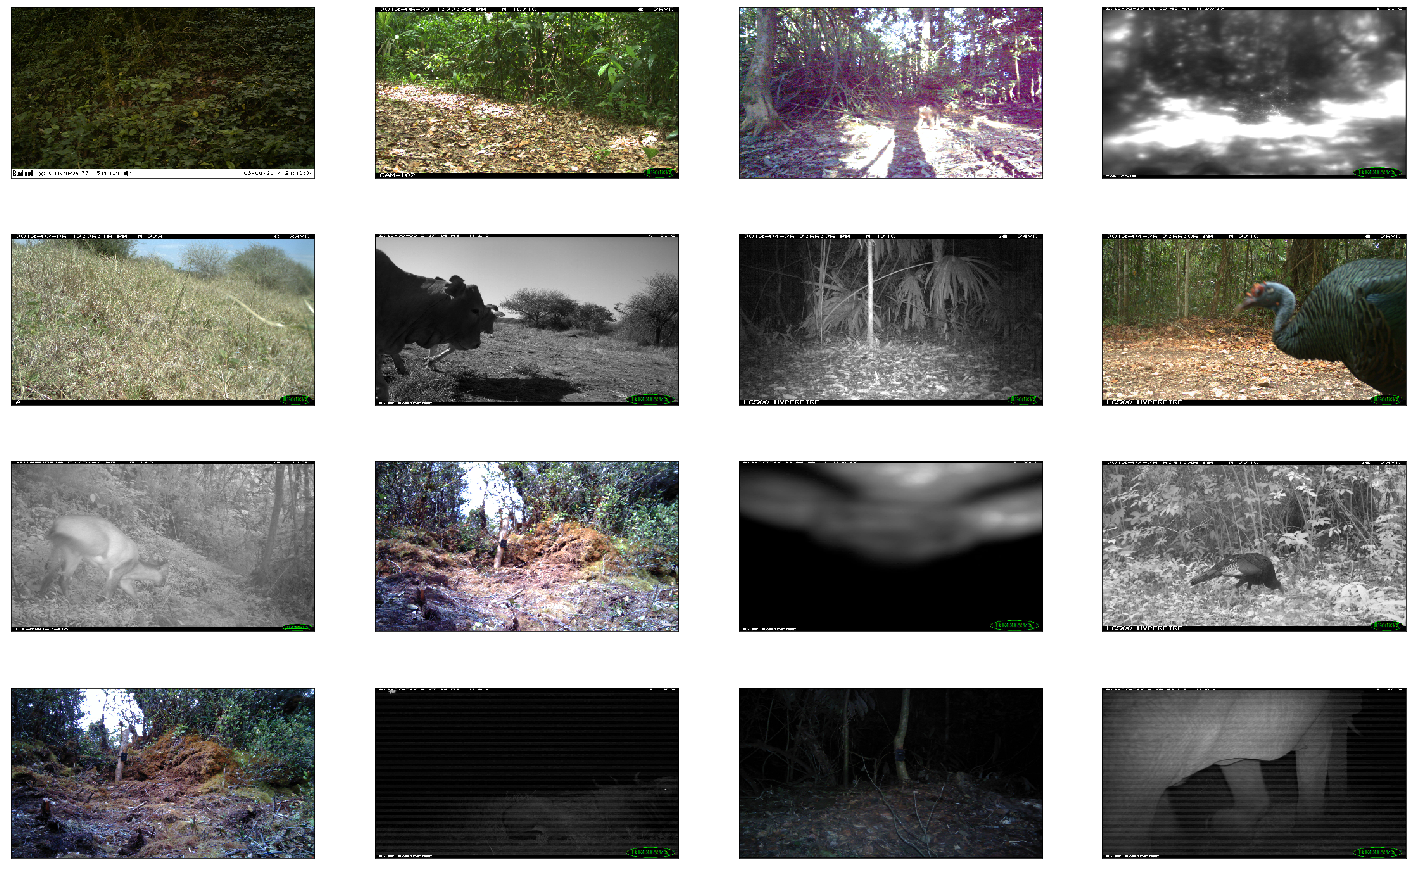

In [7]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_jpeg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

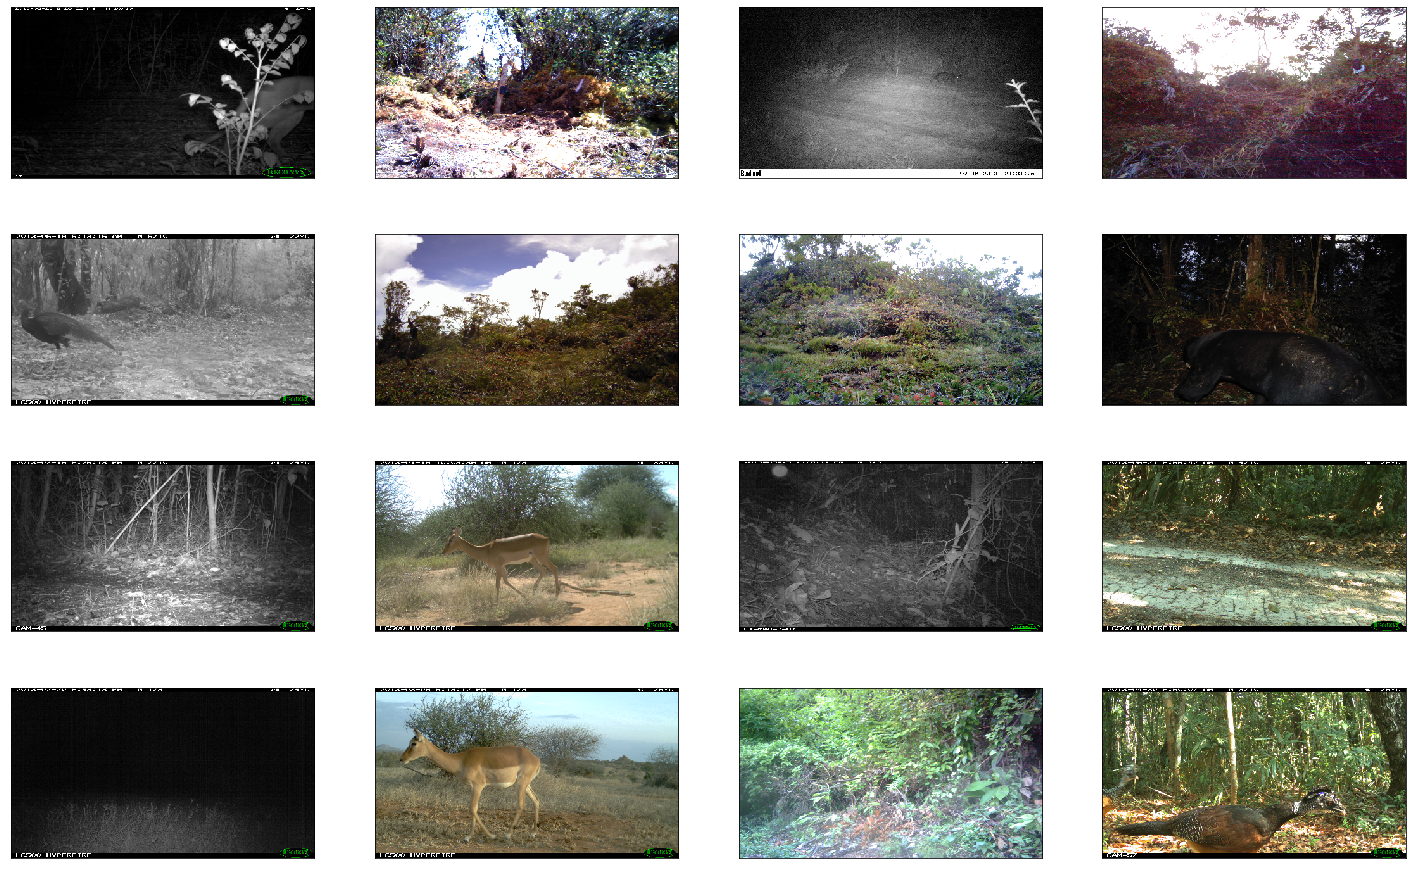

In [8]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(train_jpeg[16:32]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

### Test data

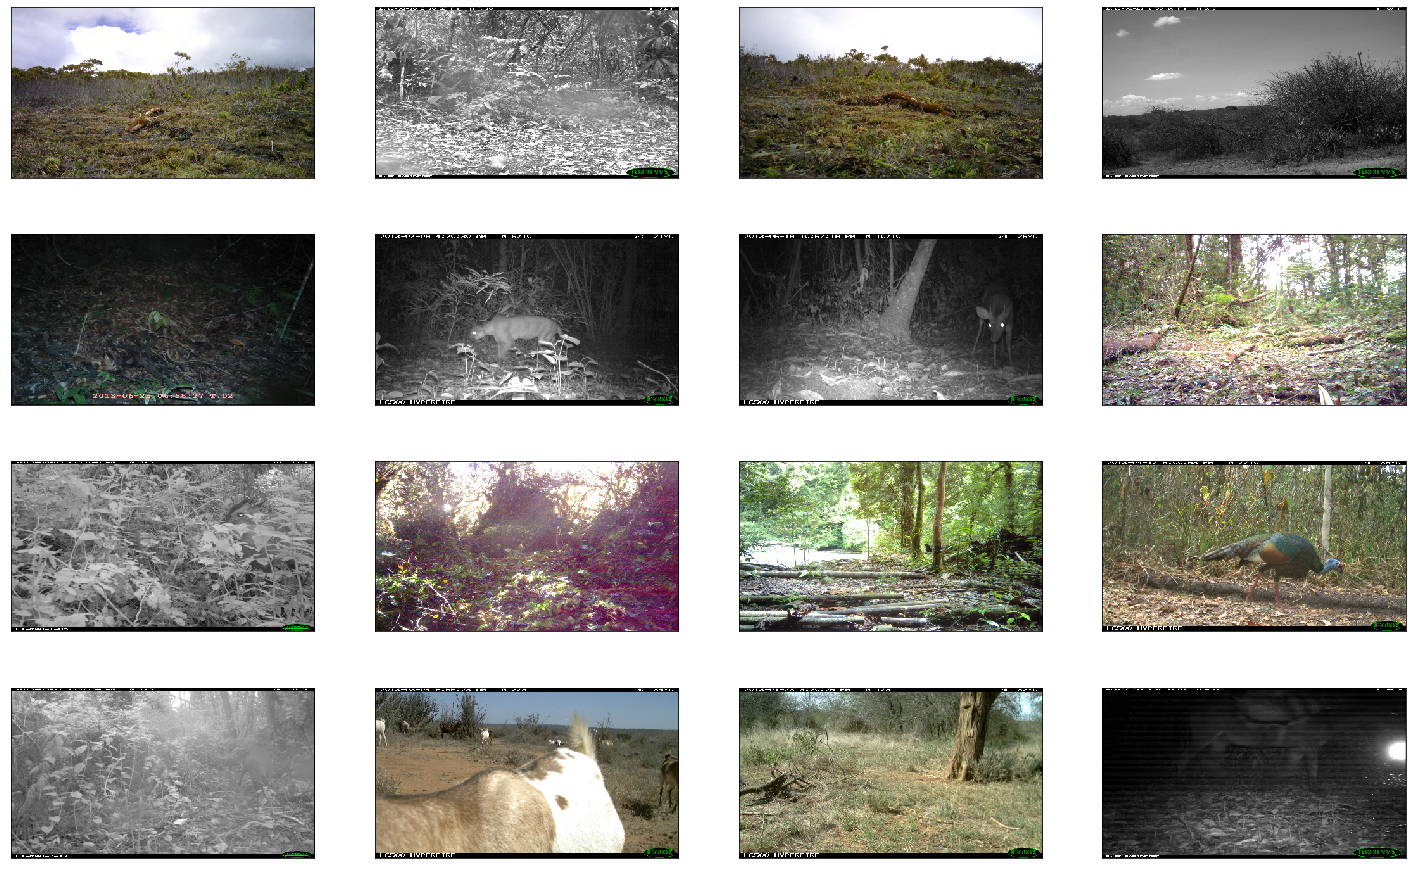

In [9]:
fig = plt.figure(figsize=(25, 16))
for i,im_path in enumerate(test_jpeg[:16]):
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    im = Image.open(im_path)
    im = im.resize((480,270))
    plt.imshow(im)

## <u>3. Checking iwildcam2020_megadetector_results.json</u>

This json contains the detection result of the training data by megadetector.

Megadetector is the pre-trained model to detect animals, people, and vehicles in camera trap images.

https://github.com/microsoft/CameraTraps/blob/master/megadetector.md#our-ask-to-megadetector-users

In [10]:
with open('./data/iwildcam-2020-fgvc7/iwildcam2020_megadetector_results.json', \
          encoding='utf-8') as json_file:
    megadetector_results =json.load(json_file)
    
megadetector_results.keys()

dict_keys(['info', 'images', 'detection_categories'])

**explore "info"**

In [11]:
megadetector_results["info"]

{'format_version': '1.0',
 'detector': 'megadetector_v3',
 'detection_completion_time': '2020-01-10 08:49:05'}

**explore "images"**

In [12]:
megadetector_results_df = pd.DataFrame(megadetector_results["images"])
megadetector_results_df.to_csv("./data/iwildcam2020_megadetector_results_images.csv", index=False)

megadetector_results_df.head()

detections  \
0  [{'category': '1', 'bbox': [0.6529, 0.5425, 0....   
1  [{'category': '1', 'bbox': [0.0147, 0.0, 0.985...   
2                                                 []   
3  [{'category': '1', 'bbox': [0.0, 0.4669, 0.185...   
4  [{'category': '1', 'bbox': [0.0, 0.0494, 0.528...   

                                     id  max_detection_conf  
0  905a3c8c-21bc-11ea-a13a-137349068a90               0.999  
1  905a3fc0-21bc-11ea-a13a-137349068a90               0.696  
2  905a420e-21bc-11ea-a13a-137349068a90               0.000  
3  905a4416-21bc-11ea-a13a-137349068a90               1.000  
4  905a579e-21bc-11ea-a13a-137349068a90               0.999

In [13]:
megadetector_results_df.loc[0, "detections"]

[{'category': '1', 'bbox': [0.6529, 0.5425, 0.3471, 0.4038], 'conf': 0.999}]

In [14]:
#Refered: https://www.kaggle.com/qinhui1999/how-to-use-bbox-for-iwildcam-2020 

def draw_bboxs(detections_list, im):
    """
    detections_list: list of set includes bbox.
    im: image read by Pillow.
    """
    
    for detection in detections_list:
        # ratios
        x1, y1, w_box, h_box = detection["bbox"]
        ymin, xmin, ymax, xmax=y1, x1, y1 + h_box, x1 + w_box
        draw = ImageDraw.Draw(im)
    
        imageWidth=im.size[0]
        imageHeight= im.size[1]
        (left, right, top, bottom) = (xmin * imageWidth, xmax * imageWidth,
                                      ymin * imageHeight, ymax * imageHeight)
        
        draw.line([(left, top), (left, bottom), (right, bottom),
               (right, top), (left, top)], width=4, fill='Red')
        pass

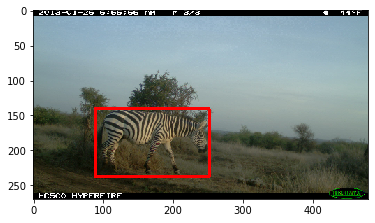

In [15]:
data_num = 7589
im = Image.open("./data/iwildcam-2020-fgvc7/train/" + megadetector_results_df.loc[data_num]['id'] + ".jpg")
im = im.resize((480,270))
draw_bboxs(megadetector_results_df.loc[data_num]['detections'], im)
plt.imshow(im)

**Note:**
- Duplicate bboxes on same object ==> Faster RCNN, NMS

**explore "detection_categories"**

In [16]:
megadetector_results["detection_categories"]

{'2': 'person', '1': 'animal'}

## <u>Data format conversion</u>

I think, maybe you are interested in data such as **category, location and datetime**.

These data are provided as json data

For comvenience, I convert json data to DataFrame.

### Train data

In [17]:
with open('./data/iwildcam-2020-fgvc7/iwildcam2020_train_annotations.json') as json_file:
    train_annotations_json = json.load(json_file)

In [18]:
train_annotations_json.keys()

dict_keys(['annotations', 'images', 'categories', 'info'])

**explore "annotations"**

In [19]:
df_annotations = pd.DataFrame(train_annotations_json["annotations"])

df_annotations.head()

count                              image_id  \
0      1  96b00332-21bc-11ea-a13a-137349068a90   
1      1  879d74d8-21bc-11ea-a13a-137349068a90   
2      1  9017f7aa-21bc-11ea-a13a-137349068a90   
3      1  90d93c58-21bc-11ea-a13a-137349068a90   
4      1  887cd0ec-21bc-11ea-a13a-137349068a90   

                                     id  category_id  
0  a292dd3c-21bc-11ea-a13a-137349068a90           73  
1  a0afcfc0-21bc-11ea-a13a-137349068a90            4  
2  a306e9c0-21bc-11ea-a13a-137349068a90          227  
3  9eed94c4-21bc-11ea-a13a-137349068a90          250  
4  a2a4dd7a-21bc-11ea-a13a-137349068a90            2

In [20]:
df_annotations.sort_values(by="count", ascending=True).loc[:100]

count                              image_id  \
14003     -1  8aa04d90-21bc-11ea-a13a-137349068a90   
13120     -1  94fd7844-21bc-11ea-a13a-137349068a90   
13119     -1  90ce514e-21bc-11ea-a13a-137349068a90   
13118     -1  8f94a06c-21bc-11ea-a13a-137349068a90   
13117     -1  97870dd2-21bc-11ea-a13a-137349068a90   
...      ...                                   ...   
104        1  89926ef6-21bc-11ea-a13a-137349068a90   
103        1  8bcc5646-21bc-11ea-a13a-137349068a90   
102        1  8e130aa8-21bc-11ea-a13a-137349068a90   
101        1  989a1958-21bc-11ea-a13a-137349068a90   
100        1  8f19a380-21bc-11ea-a13a-137349068a90   

                                         id  category_id  
14003  9d8c2320-21bc-11ea-a13a-137349068a90            0  
13120  a14871e4-21bc-11ea-a13a-137349068a90            0  
13119  9aafa398-21bc-11ea-a13a-137349068a90            0  
13118  9b960bb2-21bc-11ea-a13a-137349068a90            0  
13117  9bb81f4a-21bc-11ea-a13a-137349068a90            0  
...                                     ...          ...  
104    9c0cd8d2-21bc-11ea-a13a-137349068a90            4  
103    9a974b90-21bc-11ea-a13a-137349068a90            4  
102    9ab38274-21bc-11ea-a13a-137349068a90          235  
101    9db44724-21bc-11ea-a13a-137349068a90          230  
100    a2de1bb2-21bc-11ea-a13a-137349068a90            9  

[144247 rows x 4 columns]

In [21]:
len(df_annotations["category_id"].unique())

216

***search file names of 6 missing class***

In [22]:
import cv2
import os
missings = {#'callosciurus notatus' : 420,
            #'brotogeris sp' : 253, 
            #'leiothrix argentauris' : 408,
            #'phaetornis sp' : 251,
            #'geotrygon sp' : 235,
            'unknown bat' : 198,
           }

for missing_name, missing_id in missings.items():
    info = df_annotations[df_annotations["category_id"] == missing_id]
    print(missing_name)
    # show each image
    for img_id in info["image_id"]:
        imgpath = "./data/iwildcam-2020-fgvc7/train/" + img_id + ".jpg"
        assert os.path.exists(imgpath)
        
        print(imgpath)
        
        #img = cv2.imread(imgpath)
        #cv2.imshow("image", img)
        #cv2.waitKey(0)

unknown bat
./data/iwildcam-2020-fgvc7/train/965d2df6-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/956387ba-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/894c6d84-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/86a32e4c-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/931fdc9c-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/8e3ab4f4-21bc-11ea-a13a-137349068a90.jpg
./data/iwildcam-2020-fgvc7/train/8c5d44c6-21bc-11ea-a13a-137349068a90.jpg


**explore "images"**

In [23]:
df_images = pd.DataFrame(train_annotations_json["images"])

In [24]:
df_images.head()

seq_num_frames  location                 datetime  \
0               1       267  2013-08-08 11:45:00.000   
1               1       264  2013-08-01 22:31:00.000   
2               1        45  2013-04-17 11:15:00.000   
3               1        45  2013-04-23 08:26:00.000   
4               1        45  2013-04-24 13:51:00.000   

                                     id  frame_num  \
0  96b00332-21bc-11ea-a13a-137349068a90          1   
1  879d74d8-21bc-11ea-a13a-137349068a90          1   
2  9017f7aa-21bc-11ea-a13a-137349068a90          1   
3  90d93c58-21bc-11ea-a13a-137349068a90          1   
4  887cd0ec-21bc-11ea-a13a-137349068a90          1   

                                 seq_id  width  height  \
0  96b004ea-21bc-11ea-a13a-137349068a90   1795    1222   
1  879d7654-21bc-11ea-a13a-137349068a90   2739    1772   
2  9017f8cc-21bc-11ea-a13a-137349068a90   1891    1222   
3  90d93e38-21bc-11ea-a13a-137349068a90   1795    1222   
4  887cd29a-21bc-11ea-a13a-137349068a90   1812    1196   

                                  file_name  
0  96b00332-21bc-11ea-a13a-137349068a90.jpg  
1  879d74d8-21bc-11ea-a13a-137349068a90.jpg  
2  9017f7aa-21bc-11ea-a13a-137349068a90.jpg  
3  90d93c58-21bc-11ea-a13a-137349068a90.jpg  
4  887cd0ec-21bc-11ea-a13a-137349068a90.jpg

In [25]:
df_images.nunique()

seq_num_frames       102
location             325
datetime          171776
id                217959
frame_num           1324
seq_id             22130
width                 40
height                25
file_name         217959
dtype: int64

**explore "categories"**

In [26]:
df_categories = pd.DataFrame(train_annotations_json["categories"])

In [27]:
df_categories.tail()

count   id                     name
262      6  671  thryonomys swinderianus
263      3  672          ploceus alienus
264      3  673       ploceus baglafecht
265      2  674    poecilogale albinucha
266      6  675     anomalurus derbianus

In [28]:
# search for 6 missing labels
missings = ['callosciurus notatus', 'brotogeris sp', 'leiothrix argentauris', 'phaetornis sp', 'geotrygon sp', 'unknown bat']
for missing in missings:
    info = df_categories[df_categories["name"] == missing]
    print(missing)
    print(info)
    print()

callosciurus notatus
     count   id                  name
220      1  420  callosciurus notatus

brotogeris sp
     count   id           name
118      1  253  brotogeris sp

leiothrix argentauris
     count   id                   name
208      1  408  leiothrix argentauris

phaetornis sp
     count   id           name
116      1  251  phaetornis sp

geotrygon sp
     count   id          name
110      2  235  geotrygon sp

unknown bat
     count   id         name
102      7  198  unknown bat



In [29]:
df_categories.sort_values(by=["count"], ascending=False).head(5)

count   id                    name
0    78981    0                   empty
36   33313   75                   human
188  16713  372      meleagris ocellata
189  12908  374              crax rubra
146   9052  317  cephalophus nigrifrons

In [30]:
df_categories.sort_values(by=["count"], ascending=True).head(5)

count   id                     name
101      0  188   chelonoidis carbonaria
158      0  329   melaenornis ardesiacus
59       0  109         xerus erythropus
172      0  343  acrocephalus baeticatus
203      0  403      arctictis binturong

find out which categories are missing from train_annotations

In [31]:
max_idx = df_categories["id"].max()
missing_ids_from_train = list(set(list(range(max_idx))) - set(df_categories["id"]))
len(missing_ids_from_train)

409

**explore "info"**

In [32]:
train_annotations_json["info"]

{'year': '2020',
 'description': 'Train metadata for the iWildCam2020 challenge',
 'version': 'V1_2_26_2020',
 'contributor': 'WCS, Sara Beery, Eli Cole, Arvi Gjoka, Dan Morris, Siyu Yang'}

In [33]:
# I export DataFrame as CSV for convenience. 
df_annotations.to_csv("./data/iwildcam2020_train_annotations_annotations.csv", index=False)
df_images.to_csv("./data/iwildcam2020_train_annotations_images.csv", index=False)
df_categories.to_csv("./data/iwildcam2020_train_annotations_categories.csv", index=False)

### Test data

In [34]:
with open('./data/iwildcam-2020-fgvc7/iwildcam2020_test_information.json') as json_file:
    test_information_json = json.load(json_file)

In [35]:
test_information_json.keys()

dict_keys(['images', 'categories', 'info'])

**explore "images"**

In [36]:
df_images_test = pd.DataFrame(test_information_json["images"])
df_images_test.head(5)

seq_num_frames  location                 datetime  \
0               1        84  2013-08-02 21:44:00.000   
1               1        84  2013-08-02 21:51:00.000   
2               1       548  2013-04-25 18:23:00.000   
3               1       181  2013-04-17 16:10:00.000   
4               1       181  2013-04-20 03:11:00.000   

                                     id  frame_num  \
0  88037cce-21bc-11ea-a13a-137349068a90          1   
1  963e6b46-21bc-11ea-a13a-137349068a90          1   
2  8a1b53ba-21bc-11ea-a13a-137349068a90          1   
3  938c0d5e-21bc-11ea-a13a-137349068a90          1   
4  95b9bd92-21bc-11ea-a13a-137349068a90          1   

                                 seq_id  width  height  \
0  88037e90-21bc-11ea-a13a-137349068a90   2771    1779   
1  963e6cb8-21bc-11ea-a13a-137349068a90   2771    1779   
2  8a1b5554-21bc-11ea-a13a-137349068a90   2895    1865   
3  938c0f02-21bc-11ea-a13a-137349068a90   2902    1818   
4  95b9be96-21bc-11ea-a13a-137349068a90   2212    1841   

                                  file_name  
0  88037cce-21bc-11ea-a13a-137349068a90.jpg  
1  963e6b46-21bc-11ea-a13a-137349068a90.jpg  
2  8a1b53ba-21bc-11ea-a13a-137349068a90.jpg  
3  938c0d5e-21bc-11ea-a13a-137349068a90.jpg  
4  95b9bd92-21bc-11ea-a13a-137349068a90.jpg

In [37]:
df_images_test.nunique()

seq_num_frames       54
location             91
datetime          52407
id                62894
frame_num           973
seq_id             6506
width                27
height               18
file_name         62894
dtype: int64

**categories are as same as the DF of train annotations**

**explore "categories"**

In [38]:
df_categories_test = pd.DataFrame(test_information_json["categories"])
df_categories_test.tail(5)

count   id                     name
262      0  671  thryonomys swinderianus
263      0  672          ploceus alienus
264      0  673       ploceus baglafecht
265      0  674    poecilogale albinucha
266      0  675     anomalurus derbianus

In [39]:
df_categories_test.sort_values(by=["count"], ascending=False).head(5)

count   id                name
0    28078    0               empty
36   11765   75               human
188   5208  372  meleagris ocellata
189   3720  374          crax rubra
8     2886   10  leopardus pardalis

find missing idx from test

In [40]:
max_idx = df_categories_test["id"].max()
print(max_idx)
missing_ids_from_test = list(set(list(range(max_idx))) - set(df_categories_test["id"]))
len(missing_ids_from_test)

675


409

**train_annotation \& test_info share same missing ids**

In [41]:
set(missing_ids_from_train) - set(missing_ids_from_test)

set()

In [42]:
# I export DataFrame as CSV for convenience. 
df_images_test.to_csv("./data/iwildcam2020_train_annotations_images_test.csv", index=False)
df_categories_test.to_csv("./data/iwildcam2020_train_annotations_categories_test.csv", index=False)

## <u>Data distributions</u>

I plot train and test data in following perspective:

* Time point

* Category ID

* Location

### Time - When did data taken?

Because animals can change their activity from time to time, we want to understand how data is distributed over time.

**explore "month-year"**

In [43]:
# training annotations
month_year = df_images['datetime'].map(lambda str: str[2:7])
labels_month_year = sorted(list(set(month_year)))

# test info
month_year_test = df_images_test['datetime'].map(lambda str: str[2:7])

[(0, 50000)]

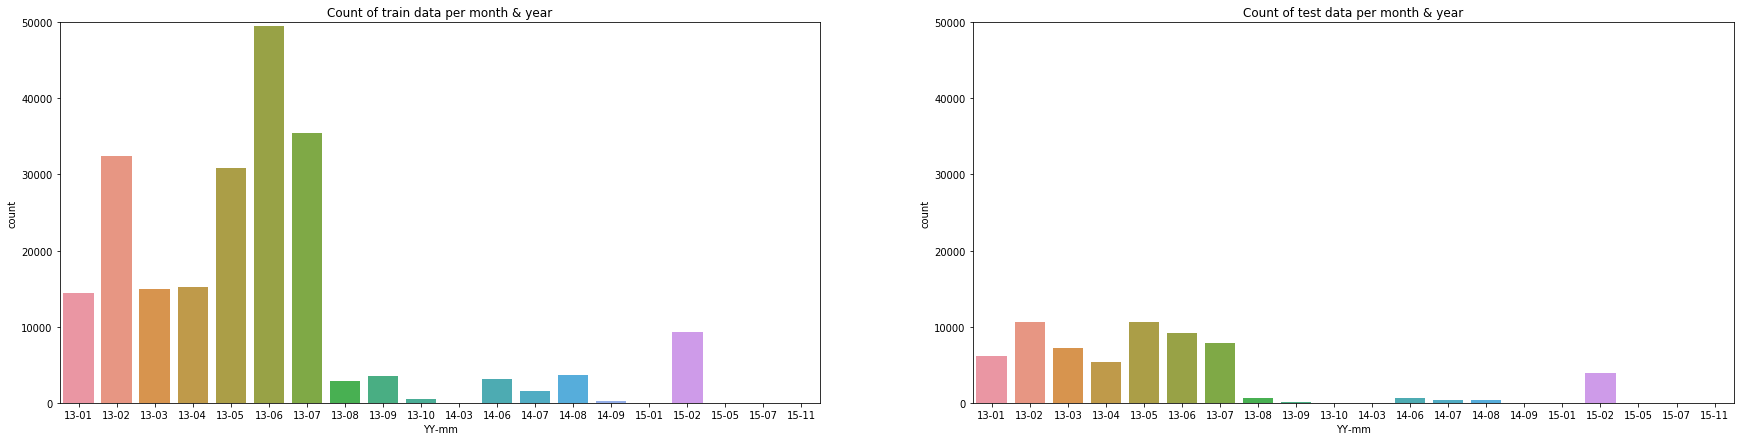

In [44]:
fig, ax = plt.subplots(1,2, figsize=(30,7))
ax = plt.subplot(1,2,1)
ax = plt.title('Count of train data per month & year')
ax = sns.countplot(month_year, order=labels_month_year)
ax.set(xlabel='YY-mm', ylabel='count')
ax.set(ylim=(0,50000))

ax = plt.subplot(1,2,2)
ax = plt.title('Count of test data per month & year')

ax = sns.countplot(month_year_test, order=labels_month_year)
ax.set(xlabel='YY-mm', ylabel='count')
ax.set(ylim=(0,50000))

Data starts 2013-01 but there seems be some lacks. 
- For example, train/test data between **2013-11 to 2014-02 are missing** 
- train/test data between **2014-10 to 2014-12 are missing** 

Also we can find that train data in between 2013-01 to 2013-07 are rich than other time point.

Train data covers test data in perspective of time point.

**explore month only**

In [45]:
labels_month = sorted(list(set(df_images['datetime'].map(lambda str: str[5:7]))))

[(0, 55000)]

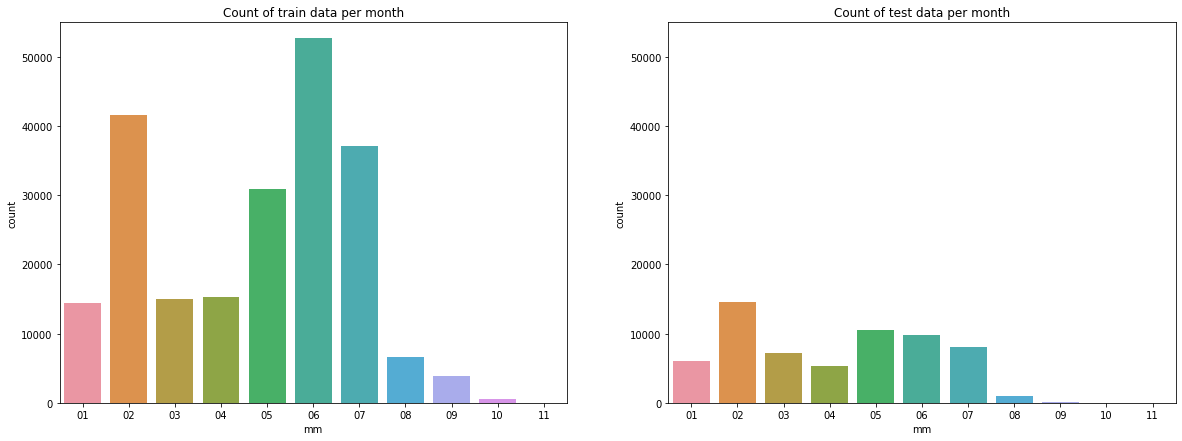

In [46]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
ax = plt.subplot(1,2,1)
plt.title('Count of train data per month')
ax = sns.countplot(df_images['datetime'].map(lambda str: str[5:7] ), order=labels_month)
ax.set(xlabel='mm', ylabel='count')
ax.set(ylim=(0,55000))

ax = plt.subplot(1,2,2)
plt.title('Count of test data per month')
ax = sns.countplot(df_images_test['datetime'].map(lambda str: str[5:7] ), order=labels_month)
ax.set(xlabel='mm', ylabel='count')
ax.set(ylim=(0,55000))

Train data are bias. In **February, May, June and July, data are rich** than other months. 

Train data covers test data in perspective of month.

Data for November and December are missing. 
- **Do animals hibernate?**
- 人犯懒没得去拍?

### num of samples - How many data are there per animal category Id?

There are a lot of categories in dataset. To confirme how many data are there in each categories, I plot barplot.  

Text(0.5, 1.0, 'distribution of count per id in train')

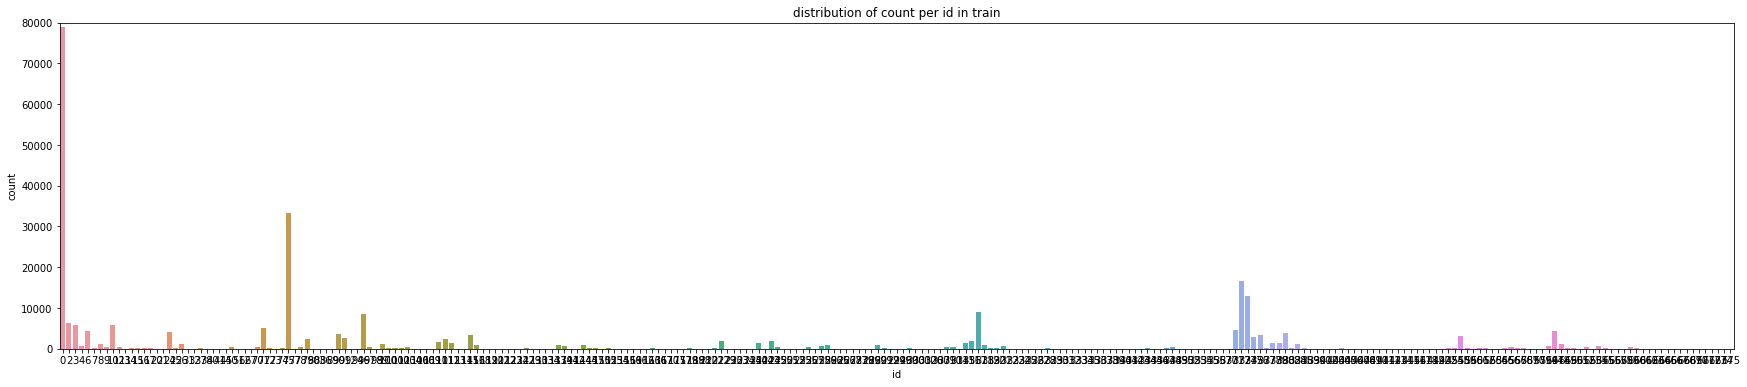

In [47]:
fig = plt.figure(figsize=(30, 6))
labels_id = sorted(list(set(df_categories["id"])))
ax = sns.barplot(x="id", y="count",data=df_categories, order=labels_id)
ax.set(ylabel='count')
ax.set(ylim=(0,80000))
plt.title('distribution of count per id in train')

Text(0.5, 1.0, 'distribution of count per id in test')

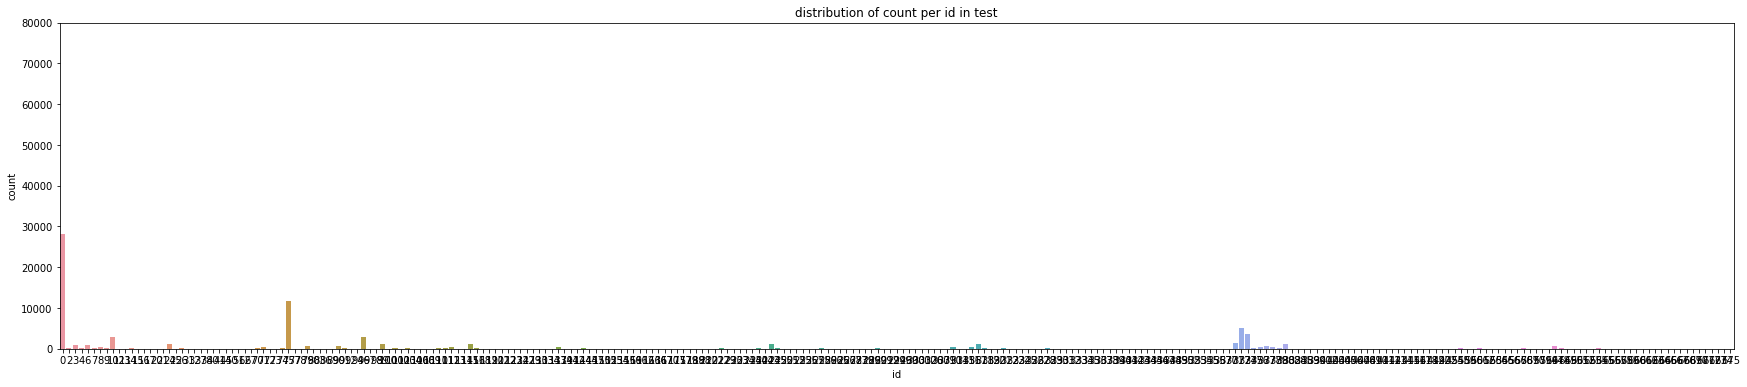

In [48]:
fig = plt.figure(figsize=(30, 6))
labels_id = sorted(list(set(df_categories["id"])))
ax = sns.barplot(x="id", y="count",data=df_categories_test, order=labels_id)
ax.set(ylabel='count')
ax.set(ylim=(0,80000))
plt.title('distribution of count per id in test')

- Frequency of data in each id is **similar for train and test data.**

Text(0.5, 1.0, 'distribution of number of data per id zoomed')

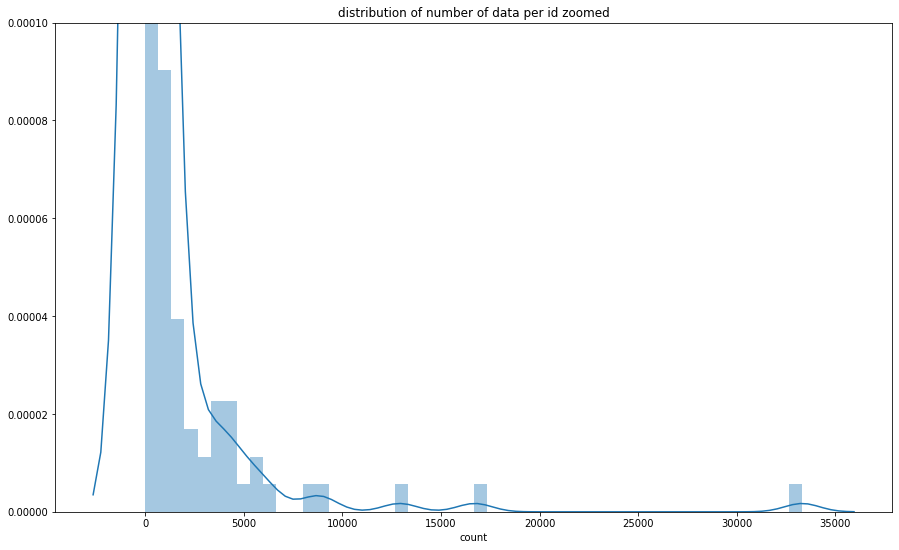

In [49]:
# dist probs of traning data
fig = plt.figure(figsize=(15, 9))
ax = sns.distplot(df_categories['count'][1:])
ax.set(ylim=(0,0.0001))
ax.set(xlabel='count')
plt.title('distribution of number of data per id zoomed')

- Almost data is less than 5000 pictures. 

- But we can find that the number of specific IDs is very large and the **data is biased.**

### Location - How many data per location?

We are required to detect photographs taken at different locations, but how distribute are data  in perspect of  location?

In [50]:
labels_location_train = sorted(list(set(df_images['location'])))
labels_location_test = sorted(list(set(df_images_test['location'])))
labels_location = labels_location_train + labels_location_test

Text(0.5, 1.0, 'Count of train data per location')

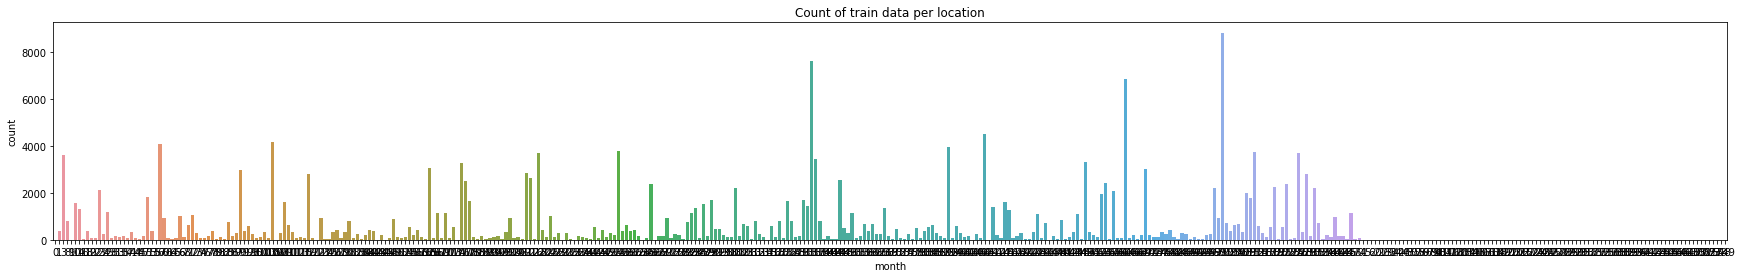

In [51]:
# training data
fig = plt.figure(figsize=(30, 4))
ax = sns.countplot(df_images['location'], order=labels_location)
ax.set(xlabel='month', ylabel='count')
plt.title('Count of train data per location')

Text(0.5, 1.0, 'Count of test data per location')

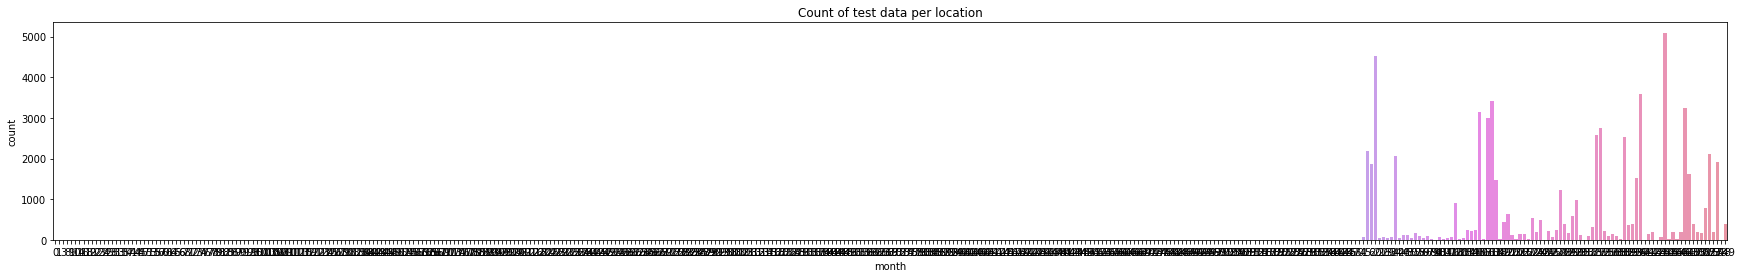

In [52]:
# test data
fig = plt.figure(figsize=(30, 4))
ax = sns.countplot(df_images_test['location'], order=labels_location)
ax.set(xlabel='month', ylabel='count')
plt.title('Count of test data per location')

- **Train data and test data seems be completelly taken in different locations.**

- Number of pictures are greatly differend by location.

### Location & Time cross

In [53]:
# training annotations of iamges
df_images_copy = df_images.copy()

df_images_copy["month_year"] = df_images_copy['datetime'].map(lambda str: str[2:7])
df_images_copy.head()

seq_num_frames  location                 datetime  \
0               1       267  2013-08-08 11:45:00.000   
1               1       264  2013-08-01 22:31:00.000   
2               1        45  2013-04-17 11:15:00.000   
3               1        45  2013-04-23 08:26:00.000   
4               1        45  2013-04-24 13:51:00.000   

                                     id  frame_num  \
0  96b00332-21bc-11ea-a13a-137349068a90          1   
1  879d74d8-21bc-11ea-a13a-137349068a90          1   
2  9017f7aa-21bc-11ea-a13a-137349068a90          1   
3  90d93c58-21bc-11ea-a13a-137349068a90          1   
4  887cd0ec-21bc-11ea-a13a-137349068a90          1   

                                 seq_id  width  height  \
0  96b004ea-21bc-11ea-a13a-137349068a90   1795    1222   
1  879d7654-21bc-11ea-a13a-137349068a90   2739    1772   
2  9017f8cc-21bc-11ea-a13a-137349068a90   1891    1222   
3  90d93e38-21bc-11ea-a13a-137349068a90   1795    1222   
4  887cd29a-21bc-11ea-a13a-137349068a90   1812    1196   

                                  file_name month_year  
0  96b00332-21bc-11ea-a13a-137349068a90.jpg      13-08  
1  879d74d8-21bc-11ea-a13a-137349068a90.jpg      13-08  
2  9017f7aa-21bc-11ea-a13a-137349068a90.jpg      13-04  
3  90d93c58-21bc-11ea-a13a-137349068a90.jpg      13-04  
4  887cd0ec-21bc-11ea-a13a-137349068a90.jpg      13-04

In [54]:
cols = df_images_copy.columns.tolist()
print(cols)

# reorder order of cols
cols = ['location', 'month_year', 'id', 'datetime', 'frame_num', 'seq_id', \
        'width', 'height', 'file_name', 'seq_num_frames']
df_images_copy = df_images_copy[cols]

['seq_num_frames', 'location', 'datetime', 'id', 'frame_num', 'seq_id', 'width', 'height', 'file_name', 'month_year']


In [55]:
df_images_copy_grp = df_images_copy.groupby(["location", "month_year"]).size()

print(df_images_copy_grp)

location  month_year
0         14-06           3
1         13-01         230
          13-02         160
3         13-04         820
          13-05         800
                       ... 
547       13-08          20
550       13-06           5
          13-07          11
551       13-02          24
          13-03          33
Length: 836, dtype: int64


### Fix animal crops - ***search for a specific class by name***

In [107]:
searching_label = "xerus rutilus"

# find corresponding category_id of searching_label
search_cats = df_categories[df_categories["name"] == searching_label]
print(searching_label)
print(search_cats)

# search images that under the same category_id
info = df_annotations[df_annotations["category_id"] == search_cats["id"].values[0]]

# show each image
for img_id in info["image_id"]:
    imgpath = "./data/iwildcam-2020-fgvc7/train/" + img_id + ".jpg"
    assert os.path.exists(imgpath)

    print(img_id + ".jpg")

    #img = cv2.imread(imgpath)
    #cv2.imshow(img_id, img)
    #cv2.waitKey(0)
    
        

xerus rutilus
     count   id           name
129     15  286  xerus rutilus
8edf458c-21bc-11ea-a13a-137349068a90.jpg
8df5c92a-21bc-11ea-a13a-137349068a90.jpg
8d8b4596-21bc-11ea-a13a-137349068a90.jpg
965d6136-21bc-11ea-a13a-137349068a90.jpg
8c90e3a8-21bc-11ea-a13a-137349068a90.jpg
8d5c1dca-21bc-11ea-a13a-137349068a90.jpg
8f556316-21bc-11ea-a13a-137349068a90.jpg
8993254e-21bc-11ea-a13a-137349068a90.jpg
883343b4-21bc-11ea-a13a-137349068a90.jpg
93fa4026-21bc-11ea-a13a-137349068a90.jpg
9779b9e8-21bc-11ea-a13a-137349068a90.jpg
92130ce8-21bc-11ea-a13a-137349068a90.jpg
900b7cfa-21bc-11ea-a13a-137349068a90.jpg
8af1d7a0-21bc-11ea-a13a-137349068a90.jpg
976151d2-21bc-11ea-a13a-137349068a90.jpg
